<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction
Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions 


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



**it is highly recommended to manually load the table using the database console LOAD tool in DB2.**

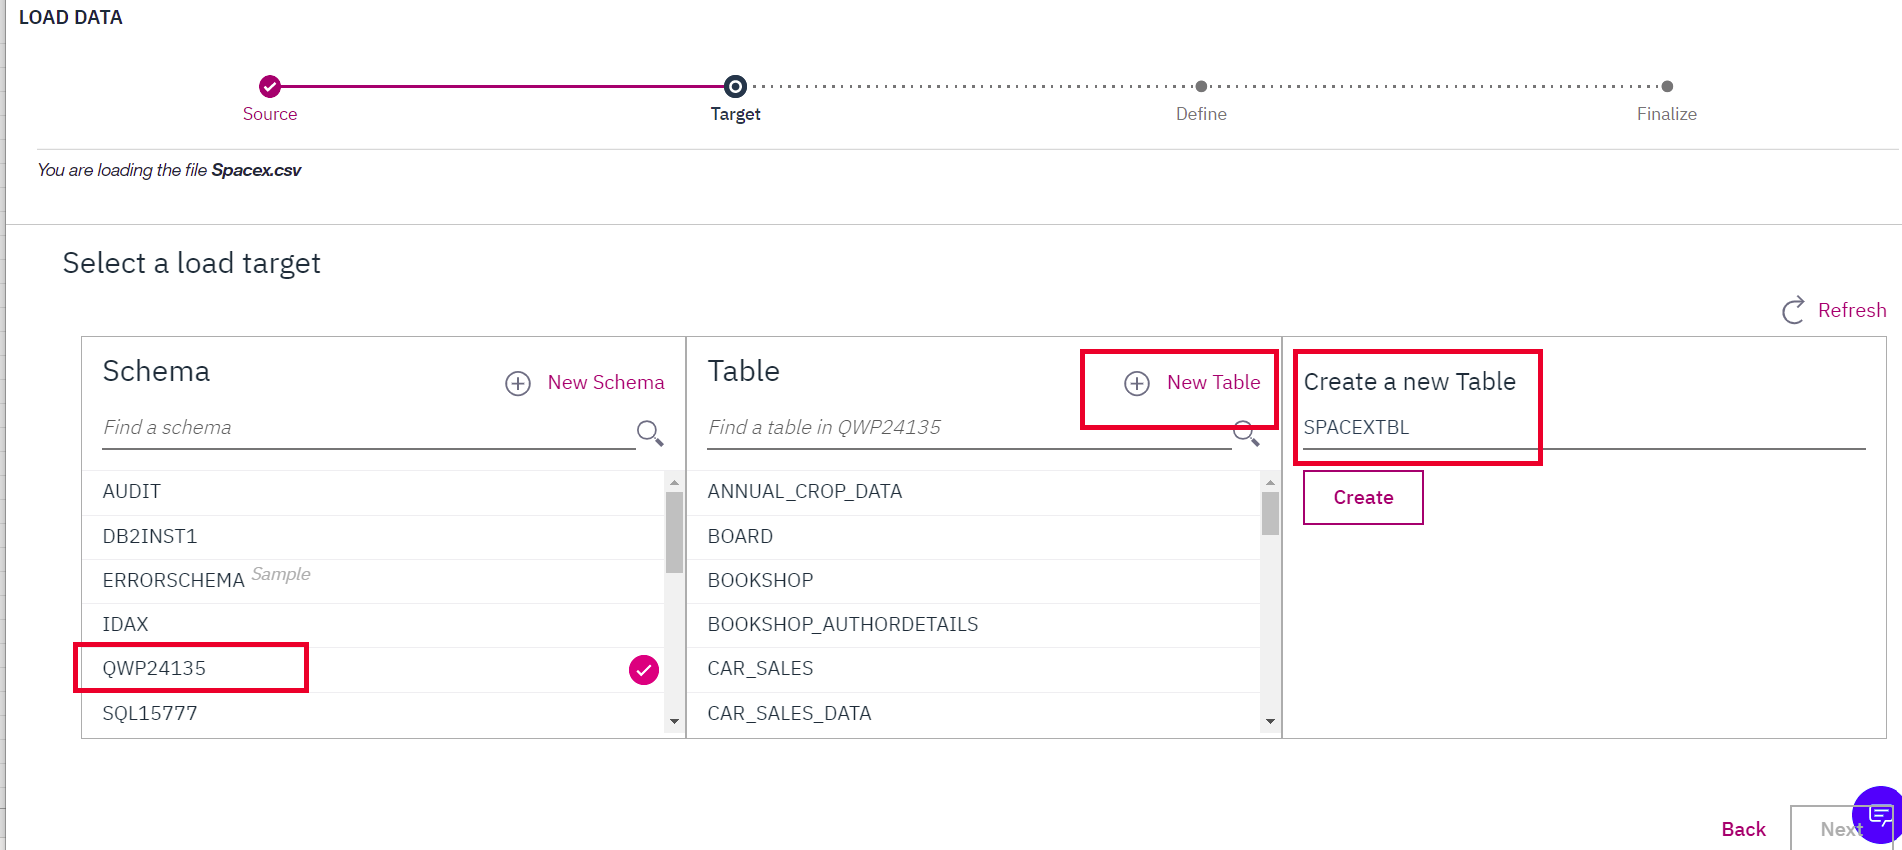

Now open the Db2 console, open the LOAD tool, Select / Drag the .CSV file for the dataset, Next create a New Table, and then follow the steps on-screen instructions to load the data. Name the new table as follows:

**SPACEXDATASET**

**Follow these steps while using old DB2 UI which is having Open Console Screen**

**Note:While loading Spacex dataset, ensure that detect datatypes is disabled. Later click on the pencil icon(edit option).**

1.  Change the Date Format by manually typing DD-MM-YYYY and timestamp format as DD-MM-YYYY HH:MM:SS.
    Here you should place the cursor at Date field and manually type as DD-MM-YYYY.
2.  Change the PAYLOAD_MASS__KG_ datatype to INTEGER.

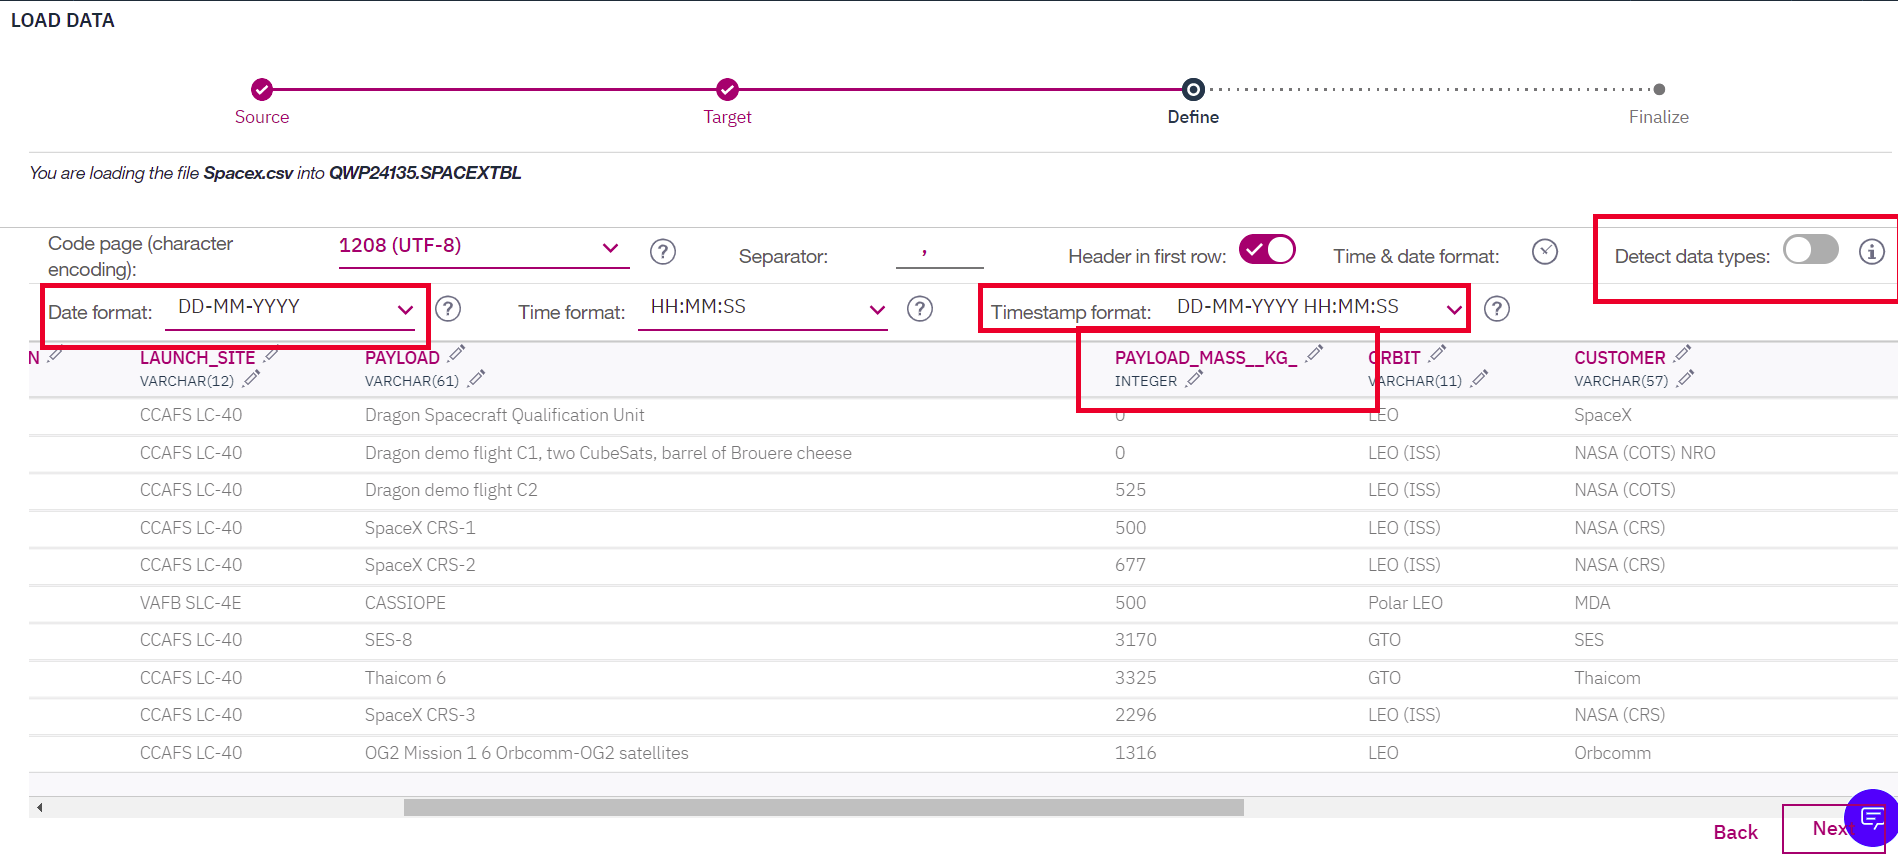

**Changes to be considered when having DB2 instance with the new UI having Go to UI screen**



    Refer to this insruction in this link for viewing the new Go to UI screen.

    Later click on Data link(below SQL) in the Go to UI screen and click on Load Data tab.

    Later browse for the downloaded spacex file.


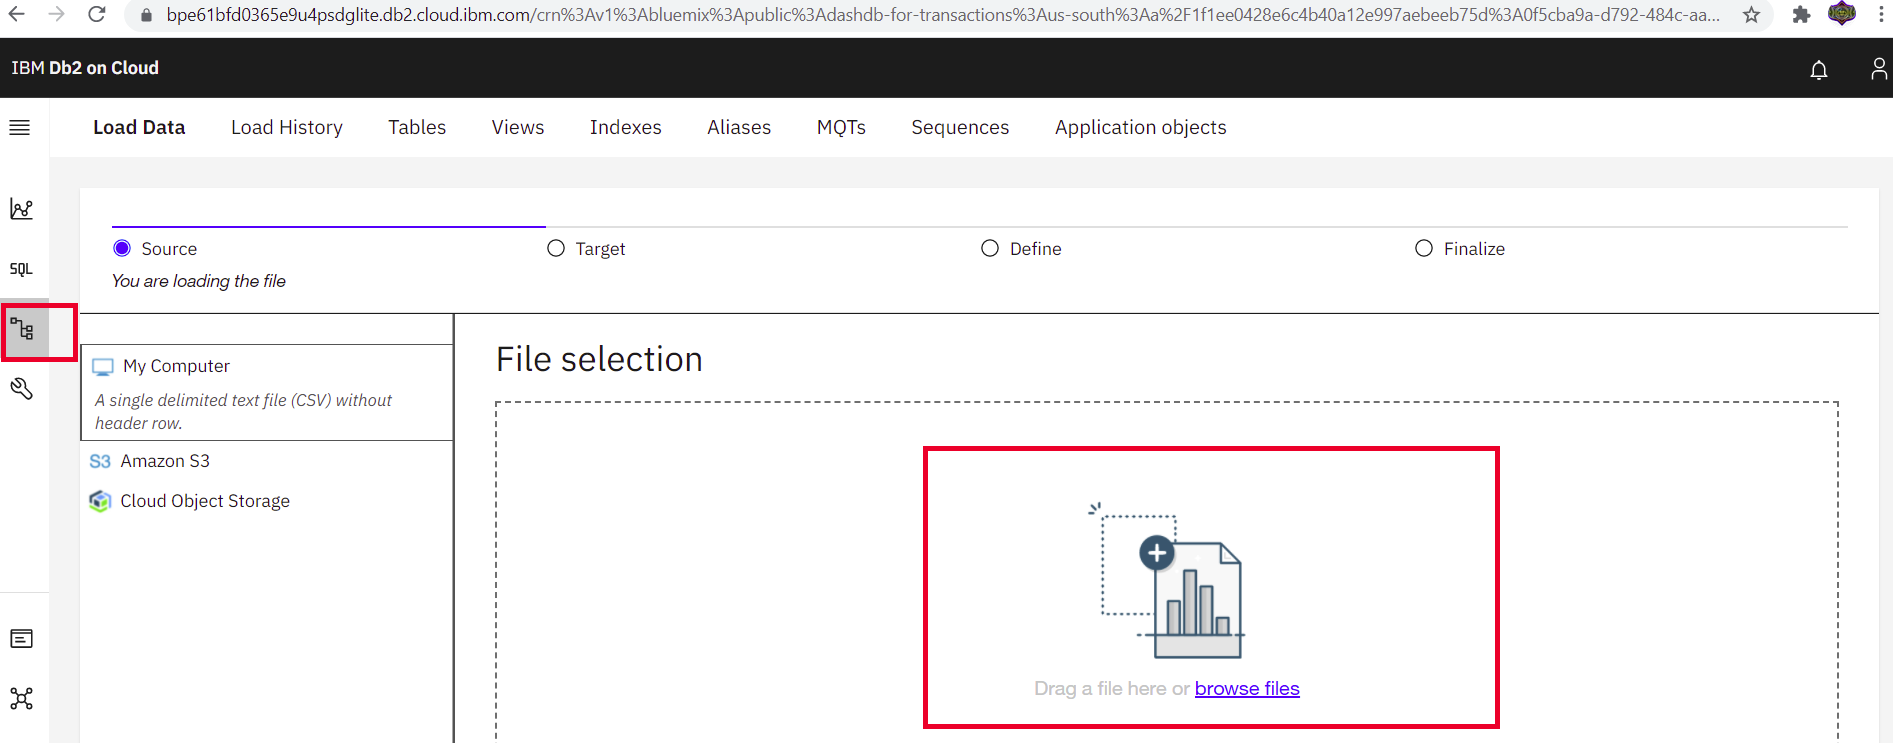

**DB2 magic in case of old UI service credentials.**

In the next cell enter your db2 connection string. Recall you created Service Credentials for your Db2 instance before. From the uri field of your Db2 service credentials copy everything after db2:// (except the double quote at the end) and paste it in the cell below after ibm_db_sa://

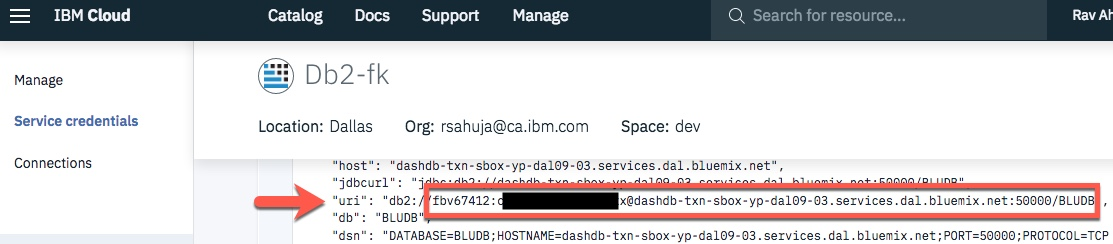

Use the following format.

Add security=SSL at the end

**%sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name?security=SSL**

In [1]:
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa
!pip install ipython-sql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 63.9 MB/s eta 0:00:0000:01:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp310-cp310-linux_x86_64.whl size=1159598 sha256=7c94fa4cc86d15882b889654b570133cbd100d985563ffc34712148b0a1227cc
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/8b/6d/9c/e1793e5a2d85b89b8c362a4f0e3def54b786bcd14923b9ff00
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.39
    Uninstalling SQLAlchemy-1.4.39:
      Successfully uninstalled SQLAlchemy-1.4.39
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 44.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [2]:
%load_ext sql

In [3]:
%sql ibm_db_sa://wvx02184:667hNVGns6bLmomx@2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.clo

Traceback (most recent call last):
  File "/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sql/connection.py", line 45, in __init__
    engine = sqlalchemy.create_engine(
  File "<string>", line 2, in create_engine
  File "/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sqlalchemy/util/deprecations.py", line 281, in warned
    return fn(*args, **kwargs)  # type: ignore[no-any-return]
  File "/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sqlalchemy/engine/create.py", line 552, in create_engine
    entrypoint = u._get_entrypoint()
  File "/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sqlalchemy/engine/url.py", line 754, in _get_entrypoint
    cls = registry.load(name)
  File "/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sqlalchemy/util/langhelpers.py", line 366, in load
    return impl.load()
  File "/opt/conda/envs/Python-3.10/lib/python3.10/importlib/metadata/__init__.py", line 171, in load
    module = import_module(match.group('modu

In [4]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [5]:
!pip install -q pandas==1.3.4

In [6]:
%sql sqlite:///my_data1.db

In [8]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

999

In [9]:
df.head()

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,06/04/2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Success,Failure (parachute)
1,12/08/2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0.0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,22/05/2012,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525.0,LEO (ISS),NASA (COTS),Success,No attempt
3,10/08/2012,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),Success,No attempt
4,03/01/2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),Success,No attempt


## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [10]:
%sql SELECT DISTINCT(LAUNCH_SITE) FROM SPACEXTBL;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40
None



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 


In [11]:
%%sql 
SELECT * 
FROM SPACEXTBL
WHERE LAUNCH_SITE LIKE 'CCA%'
LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
06/04/2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Success,Failure (parachute)
12/08/2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0.0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
22/05/2012,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525.0,LEO (ISS),NASA (COTS),Success,No attempt
10/08/2012,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),Success,No attempt
03/01/2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [12]:
%%sql 
SELECT SUM(PAYLOAD_MASS__KG_)
FROM SPACEXTBL
WHERE CUSTOMER = 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


SUM(PAYLOAD_MASS__KG_)
45596.0


### Task 4




##### Display average payload mass carried by booster version F9 v1.1


In [13]:
%%sql 
SELECT AVG(PAYLOAD_MASS__KG_)
FROM SPACEXTBL
WHERE BOOSTER_VERSION LIKE 'F9 v1.1%';

 * sqlite:///my_data1.db
Done.


AVG(PAYLOAD_MASS__KG_)
2534.6666666666665


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


In [20]:
%%sql 
SELECT MIN(DATE),LANDING_OUTCOME
FROM SPACEXTBL
GROUP BY LANDING_OUTCOME

 * sqlite:///my_data1.db
Done.


MIN(DATE),Landing_Outcome
None,None
02/11/2015,Controlled (ocean)
12/05/2018,Failure
01/10/2015,Failure (drone ship)
06/04/2010,Failure (parachute)
01/06/2014,No attempt
08/06/2019,No attempt
28/06/2015,Precluded (drone ship)
01/07/2020,Success
04/08/2016,Success (drone ship)


In [14]:
%%sql 
SELECT MIN(DATE)
FROM SPACEXTBL
WHERE LANDING_OUTCOME = 'Success (ground pad)';

 * sqlite:///my_data1.db
Done.


MIN(DATE)
01/08/2018


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [21]:
%%sql 
SELECT DISTINCT(BOOSTER_VERSION), LANDING_OUTCOME, PAYLOAD_MASS__KG_
FROM SPACEXTBL
WHERE LANDING_OUTCOME = 'Success (drone ship)' AND PAYLOAD_MASS__KG_ BETWEEN 4000 AND 6000
GROUP BY LANDING_OUTCOME, PAYLOAD_MASS__KG_;

 * sqlite:///my_data1.db
Done.


Booster_Version,Landing_Outcome,PAYLOAD_MASS__KG_
F9 FT B1026,Success (drone ship),4600.0
F9 FT B1022,Success (drone ship),4696.0
F9 FT B1031.2,Success (drone ship),5200.0
F9 FT B1021.2,Success (drone ship),5300.0


### Task 7




##### List the total number of successful and failure mission outcomes


In [22]:
%%sql 
SELECT COUNT(LANDING_OUTCOME) AS SUCCESSFUL_MISSIONS
FROM SPACEXTBL
WHERE LANDING_OUTCOME LIKE 'Success%';

 * sqlite:///my_data1.db
Done.


SUCCESSFUL_MISSIONS
61


In [23]:
%%sql
SELECT COUNT(LANDING_OUTCOME) AS FAILURE_MISSIONS
FROM SPACEXTBL
WHERE LANDING_OUTCOME LIKE 'Failure%';

 * sqlite:///my_data1.db
Done.


FAILURE_MISSIONS
10


### Task 8



##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [24]:
%%sql 
SELECT DISTINCT(BOOSTER_VERSION), PAYLOAD_MASS__KG_
FROM SPACEXTBL
WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTBL)

 * sqlite:///my_data1.db
Done.


Booster_Version,PAYLOAD_MASS__KG_
F9 B5 B1048.4,15600.0
F9 B5 B1049.4,15600.0
F9 B5 B1051.3,15600.0
F9 B5 B1056.4,15600.0
F9 B5 B1048.5,15600.0
F9 B5 B1051.4,15600.0
F9 B5 B1049.5,15600.0
F9 B5 B1060.2,15600.0
F9 B5 B1058.3,15600.0
F9 B5 B1051.6,15600.0


### Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 4, 2) as month to get the months and substr(Date,7,4)='2015' for year.**


In [25]:
%%sql 
SELECT LANDING_OUTCOME, BOOSTER_VERSION, LAUNCH_SITE, substr(Date,7,4) AS DATE_YEAR
FROM SPACEXTBL
WHERE LANDING_OUTCOME = 'Failure (drone ship)' AND DATE_YEAR = '2015'; 

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Booster_Version,Launch_Site,DATE_YEAR
Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40,2015
Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40,2015


### Task 10




##### Rank the  count of  successful landing_outcomes between the date 04-06-2010 and 20-03-2017 in descending order.


In [26]:
%%sql 
SELECT LANDING_OUTCOME, COUNT(LANDING_OUTCOME) AS COUNT
FROM SPACEXTBL
WHERE DATE BETWEEN '04-06-2010'  AND '20-03-2017'
GROUP BY LANDING_OUTCOME
ORDER BY COUNT DESC

 * sqlite:///my_data1.db
Done.


Landing_Outcome,COUNT
Success,20
No attempt,10
Success (drone ship),8
Success (ground pad),7
Failure (drone ship),3
Failure,3
Failure (parachute),2
Controlled (ocean),2
No attempt,1


### Reference Links

* <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>  

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*  <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb">Hands-on Lab: Analyzing a real World Data Set</a>




## Author(s)

<h4> Lakshmi Holla </h4>


## Other Contributors

<h4> Rav Ahuja </h4>


## Change log
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2021-07-09 | 0.2 |Lakshmi Holla | Changes made in magic sql|
| 2021-05-20 | 0.1 |Lakshmi Holla | Created Initial Version |


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
